# Homework 5
## Kevin Pham
## CS 4650-01

Assignment Text:

Your Homework 5 assignment was searched and found on the programmableweb!

The following link will go over the concept of your assignment:

https://www.programmableweb.com/news/how-to-extract-covid-19-keywords-news-using-python/how-to/2020/03/11

The  tutorial can be found at the following link:

https://medium.com/analytics-vidhya/extracting-keywords-from-covid-19-news-with-python-13249571d37b

What to submit:

PDF or DOC file with the following information:

1) github url to your python code   (

2) screen capture of your code

3) screen capture of dataset either text editor or Excel.

As a bonus try wordcloud! (not required)



Web References used while learning assignment, Where ideas came from:
https://www.youtube.com/watch?v=oUuIVJ96JsI&t=1s&ab_channel=IzzyAnalytics

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

https://www.youtube.com/watch?v=Dh4El5MtxpE&ab_channel=KnowledgeCenter

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/


In [69]:
# Dependendcies
#!pip install spacy
#!pip install newsapi-python

# Install the language model for English
#!python -m spacy download en_core_web_lg

In [183]:
# Imports
import pandas as pd
import spacy
from newsapi.newsapi_client import NewsApiClient

In [184]:
npl_eng = spacy.load("en_core_web_sm")

In [185]:
newsapi = NewsApiClient (api_key='1b5c273652dd40d3a681d2e3d7905558')

In [186]:
# News API will only return 30 days back for unpaid
temp = newsapi.get_everything(q='coronavirus', language='en',
                             from_param='2020-10-10', to='2020-11-02',
                             sort_by='relevancy')

In [158]:
articles = temp['articles']
articles

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Beth Skwarecki on Vitals, shared by Beth Skwarecki to Lifehacker',
  'title': "Sorry, Mouthwash Isn't a Coronavirus Cure",
  'description': 'Mouthwash is designed to kill germs in your mouth. It is, I’d have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infections, or any other mouth-germ-y illness. We shouldn’t get …',
  'url': 'https://vitals.lifehacker.com/sorry-mouthwash-isnt-a-coronavirus-cure-1845440818',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/wkaxtbskwr6rpgdckjzq.jpg',
  'publishedAt': '2020-10-21T19:45:00Z',
  'content': 'Mouthwash is designed to kill germs in your mouth. It is, Id have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infec… [+4209 chars]'},
 {'source'

In [187]:
# view of a newsapi article object for better understanding
for key, value in articles[0].items():
    print(f"\n {key.ljust(15)} {value}")


 source          {'id': None, 'name': 'Lifehacker.com'}

 author          Beth Skwarecki on Vitals, shared by Beth Skwarecki to Lifehacker

 title           Sorry, Mouthwash Isn't a Coronavirus Cure

 description     Mouthwash is designed to kill germs in your mouth. It is, I’d have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infections, or any other mouth-germ-y illness. We shouldn’t get …

 url             https://vitals.lifehacker.com/sorry-mouthwash-isnt-a-coronavirus-cure-1845440818

 urlToImage      https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/wkaxtbskwr6rpgdckjzq.jpg

 publishedAt     2020-10-21T19:45:00Z

 content         Mouthwash is designed to kill germs in your mouth. It is, Id have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infec… [+4209 cha

In [188]:
# View the types of headlines in the article 
for x, y in enumerate(articles):
    print(f'{x} {y["title"]}')

0 Sorry, Mouthwash Isn't a Coronavirus Cure
1 Check an Airline's Coronavirus Policies Before Booking
2 Twitter flags, limits sharing on Trump tweet about being “immune” to coronavirus
3 Coronavirus and Home Design
4 Coronavirus Briefing: What Happened Today
5 Coronavirus Briefing: What Happened Today
6 Coronavirus Briefing: What Happened Today
7 Coronavirus Briefing: What Happened Today
8 Coronavirus Briefing: What Happened Today
9 Coronavirus Briefing: What Happened Today
10 Coronavirus Briefing: What Happened Today
11 Coronavirus Briefing: What Happened Today
12 Coronavirus Briefing: What Happened Today
13 Trump Attacks Fauci Over Coronavirus
14 Coronavirus Briefing: What Happened Today
15 The Conners Return to Confront the Coronavirus
16 Coronavirus in California: An Update on Cases
17 First Coronavirus Hit, Then They Got Bedbugs
18 YouTube Now Says It Will Remove Videos Lying About Coronavirus Vaccines
19 Trump Dismisses Virus Coverage and Biden Dismisses Virus Leadership: This Wee

In [214]:
df = pd.DataFrame(articles)
df.head(3)

,author,content,description,publishedAt,source,title,url,urlToImage
0,"Beth Skwarecki on Vitals, shared by Beth Skwarecki to Lifehacker","Mouthwash is designed to kill germs in your mouth. It is, Id have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infec… [+4209 chars]","Mouthwash is designed to kill germs in your mouth. It is, I’d have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infections, or any other mouth-germ-y illness. We shouldn’t get …",2020-10-21T19:45:00Z,"{'id': None, 'name': 'Lifehacker.com'}","Sorry, Mouthwash Isn't a Coronavirus Cure",https://vitals.lifehacker.com/sorry-mouthwash-isnt-a-coronavirus-cure-1845440818,"https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/wkaxtbskwr6rpgdckjzq.jpg"
1,Elizabeth Yuko,"Navigating air travel during the COVID-19 pandemic has been tricky. First and foremost, you want to make sure that youre as safe as possible. On top of that, there are fewer routes and flights availa… [+3231 chars]","Navigating air travel during the COVID-19 pandemic has been tricky. First and foremost, you want to make sure that you’re as safe as possible. On top of that, there are fewer routes and flights available, travel restrictions, and other guidelines that seem to…",2020-10-21T16:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}",Check an Airline's Coronavirus Policies Before Booking,https://lifehacker.com/check-an-airlines-coronavirus-policies-before-booking-1845432440,"https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/dyptlcdjxmulrrv7jpwd.jpg"
2,Kim Lyons,The tweet violated the platforms rules against sharing coronavirus misinformation\r\nIllustration by Alex Castro / The Verge\r\nTwitter disabled some sharing options on a tweet from President Trump on Su… [+2699 chars],"Twitter disabled sharing options on a tweet from President Trump on Sunday, and labeled it for violating its rules against spreading coronavirus misinformation. The president’s assertion he is “immune” conflicts with the CDC’s guidance on coronavirus reinfect…",2020-10-11T19:11:34Z,"{'id': 'the-verge', 'name': 'The Verge'}","Twitter flags, limits sharing on Trump tweet about being “immune” to coronavirus",https://www.theverge.com/2020/10/11/21511682/twitter-disables-sharing-trump-tweet-coronavirus-misinformation,https://cdn.vox-cdn.com/thumbor/1zez70uv4JdlHC48r4RTKuJo7kw=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/20086270/acastro_200715_1777_twitter_0005.0.jpg


In [215]:
# keep only needed content
df = df[['title', 'description', 'content']]
df.head(5)

df['content']

0     Mouthwash is designed to kill germs in your mouth. It is, Id have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infec… [+4209 chars]    
1     Navigating air travel during the COVID-19 pandemic has been tricky. First and foremost, you want to make sure that youre as safe as possible. On top of that, there are fewer routes and flights availa… [+3231 chars]    
2     The tweet violated the platforms rules against sharing coronavirus misinformation\r\nIllustration by Alex Castro / The Verge\r\nTwitter disabled some sharing options on a tweet from President Trump on Su… [+2699 chars]
3     The coronavirus pandemic is already shaping home design trends, with special-function rooms and products that serve needs particular to the pandemic rising in popularity, according to a recent survey… [+992 chars]     
4     Many leaders most notably President Trump have described the arrival of a coronavirus vaccine 

In [216]:
# Remove stop words, english filler words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re 

In [217]:
# Download the nltk stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pkevineye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
# list of stop words 
stops = stopwords.words('english')
stops.append('u') # remove 'u' stopword...

In [219]:
# tokenize string text function
def tokenize(text):
    re.split('\W+', text)
    tokens = re.split('\W+', text)
    return tokens

# remove stop words
def remove_stopwords(text_token):
    text_no_stops = [word for word in text_token if word not in stops]
    return text_no_stops

In [220]:
# Tokenize the columns
df['desc_token'] = df['description'].apply(lambda x: tokenize(x.lower()))

df['title_token'] = df['description'].apply(lambda x: tokenize(x.lower()))

df['content_token'] = df['description'].apply(lambda x: tokenize(x.lower()))
df.head(2)

,title,description,content,desc_token,title_token,content_token
0,"Sorry, Mouthwash Isn't a Coronavirus Cure","Mouthwash is designed to kill germs in your mouth. It is, I’d have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infections, or any other mouth-germ-y illness. We shouldn’t get …","Mouthwash is designed to kill germs in your mouth. It is, Id have to say, pretty good at its job. And yet: we do not seriously trust mouthwash to prevent the transmission of common colds, strep infec… [+4209 chars]","[mouthwash, is, designed, to, kill, germs, in, your, mouth, it, is, i, d, have, to, say, pretty, good, at, its, job, and, yet, we, do, not, seriously, trust, mouthwash, to, prevent, the, transmission, of, common, colds, strep, infections, or, any, other, mouth, germ, y, illness, we, shouldn, t, get, ]","[mouthwash, is, designed, to, kill, germs, in, your, mouth, it, is, i, d, have, to, say, pretty, good, at, its, job, and, yet, we, do, not, seriously, trust, mouthwash, to, prevent, the, transmission, of, common, colds, strep, infections, or, any, other, mouth, germ, y, illness, we, shouldn, t, get, ]","[mouthwash, is, designed, to, kill, germs, in, your, mouth, it, is, i, d, have, to, say, pretty, good, at, its, job, and, yet, we, do, not, seriously, trust, mouthwash, to, prevent, the, transmission, of, common, colds, strep, infections, or, any, other, mouth, germ, y, illness, we, shouldn, t, get, ]"
1,Check an Airline's Coronavirus Policies Before Booking,"Navigating air travel during the COVID-19 pandemic has been tricky. First and foremost, you want to make sure that you’re as safe as possible. On top of that, there are fewer routes and flights available, travel restrictions, and other guidelines that seem to…","Navigating air travel during the COVID-19 pandemic has been tricky. First and foremost, you want to make sure that youre as safe as possible. On top of that, there are fewer routes and flights availa… [+3231 chars]","[navigating, air, travel, during, the, covid, 19, pandemic, has, been, tricky, first, and, foremost, you, want, to, make, sure, that, you, re, as, safe, as, possible, on, top, of, that, there, are, fewer, routes, and, flights, available, travel, restrictions, and, other, guidelines, that, seem, to, ]","[navigating, air, travel, during, the, covid, 19, pandemic, has, been, tricky, first, and, foremost, you, want, to, make, sure, that, you, re, as, safe, as, possible, on, top, of, that, there, are, fewer, routes, and, flights, available, travel, restrictions, and, other, guidelines, that, seem, to, ]","[navigating, air, travel, during, the, covid, 19, pandemic, has, been, tricky, first, and, foremost, you, want, to, make, sure, that, you, re, as, safe, as, possible, on, top, of, that, there, are, fewer, routes, and, flights, available, travel, restrictions, and, other, guidelines, that, seem, to, ]"


In [221]:
# Remove stopwords from tokenized list
df['title'] = df['title_token'].apply(lambda x: remove_stopwords(x))
df['description'] = df['desc_token'].apply(lambda x: remove_stopwords(x))
df['content'] = df['content_token'].apply(lambda x: remove_stopwords(x))

In [224]:
# Consolidate Cleaned Data
df = df[['title', 'description', 'content']]
df.head()

,title,description,content
0,"[mouthwash, designed, kill, germs, mouth, say, pretty, good, job, yet, seriously, trust, mouthwash, prevent, transmission, common, colds, strep, infections, mouth, germ, illness, get, ]","[mouthwash, designed, kill, germs, mouth, say, pretty, good, job, yet, seriously, trust, mouthwash, prevent, transmission, common, colds, strep, infections, mouth, germ, illness, get, ]","[mouthwash, designed, kill, germs, mouth, say, pretty, good, job, yet, seriously, trust, mouthwash, prevent, transmission, common, colds, strep, infections, mouth, germ, illness, get, ]"
1,"[navigating, air, travel, covid, 19, pandemic, tricky, first, foremost, want, make, sure, safe, possible, top, fewer, routes, flights, available, travel, restrictions, guidelines, seem, ]","[navigating, air, travel, covid, 19, pandemic, tricky, first, foremost, want, make, sure, safe, possible, top, fewer, routes, flights, available, travel, restrictions, guidelines, seem, ]","[navigating, air, travel, covid, 19, pandemic, tricky, first, foremost, want, make, sure, safe, possible, top, fewer, routes, flights, available, travel, restrictions, guidelines, seem, ]"
2,"[twitter, disabled, sharing, options, tweet, president, trump, sunday, labeled, violating, rules, spreading, coronavirus, misinformation, president, assertion, immune, conflicts, cdc, guidance, coronavirus, reinfect, ]","[twitter, disabled, sharing, options, tweet, president, trump, sunday, labeled, violating, rules, spreading, coronavirus, misinformation, president, assertion, immune, conflicts, cdc, guidance, coronavirus, reinfect, ]","[twitter, disabled, sharing, options, tweet, president, trump, sunday, labeled, violating, rules, spreading, coronavirus, misinformation, president, assertion, immune, conflicts, cdc, guidance, coronavirus, reinfect, ]"
3,"[recent, survey, architects, reveals, clients, looking, ways, improve, time, spend, home, ]","[recent, survey, architects, reveals, clients, looking, ways, improve, time, spend, home, ]","[recent, survey, architects, reveals, clients, looking, ways, improve, time, spend, home, ]"
4,"[near, future, may, hold]","[near, future, may, hold]","[near, future, may, hold]"


In [232]:
# List and count tools
from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [228]:
# Aggregate data for graph with a count of # of words
# We will use the content for this example.
desc_wordlist = list(itertools.chain(*df['description']))
desc_wordcount = collections.Counter(desc_wordlist)
desc_wordcount

Counter({'mouthwash': 2,
         'designed': 1,
         'kill': 1,
         'germs': 1,
         'mouth': 2,
         'say': 1,
         'pretty': 1,
         'good': 1,
         'job': 1,
         'yet': 1,
         'seriously': 1,
         'trust': 1,
         'prevent': 1,
         'transmission': 1,
         'common': 1,
         'colds': 1,
         'strep': 1,
         'infections': 1,
         'germ': 1,
         'illness': 1,
         'get': 1,
         '': 19,
         'navigating': 1,
         'air': 1,
         'travel': 2,
         'covid': 2,
         '19': 2,
         'pandemic': 6,
         'tricky': 1,
         'first': 1,
         'foremost': 1,
         'want': 1,
         'make': 1,
         'sure': 1,
         'safe': 1,
         'possible': 2,
         'top': 1,
         'fewer': 1,
         'routes': 1,
         'flights': 1,
         'available': 1,
         'restrictions': 1,
         'guidelines': 1,
         'seem': 1,
         'twitter': 1,
         'disabl

In [247]:
df_analyze = pd.DataFrame(content_wordcount.most_common(15),
                         columns = ['words', 'count'])
df_analyze.drop([0], inplace=True)
df_analyze.head(25)

,words,count
1,coronavirus,7
2,pandemic,6
3,president,4
4,trump,3
5,mouthwash,2
6,mouth,2
7,travel,2
8,covid,2
9,19,2
10,possible,2


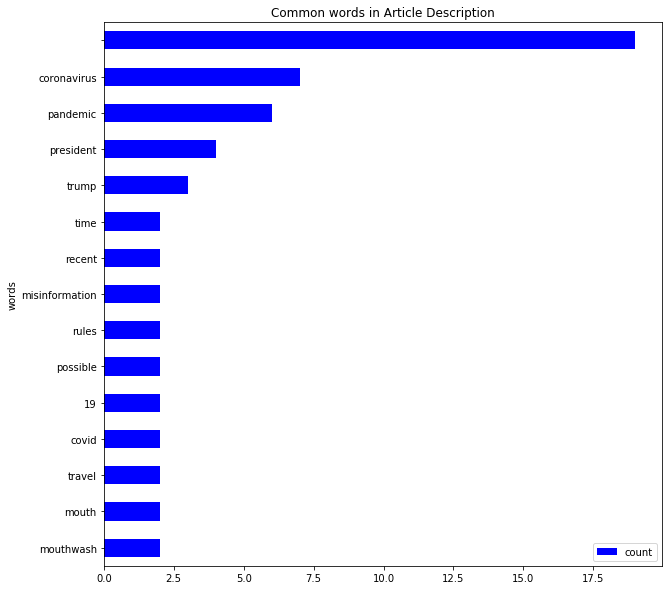

In [238]:
fig, ax = plt.subplots(figsize=(10, 10))
df_analyze.sort_values(by='count').plot.barh(x='words',
                                                y='count',
                                                ax=ax,
                                                color="blue")
ax.set_title("Common words in Article Description")
plt.show()